In [5]:
import jams
import os
import matplotlib.pyplot as plt
#este modulo es local (interpreter.py) y contiene las funciones que se usan para visualizar los jams
import interpreter as itp
## Change This Cell!
gs_path = "./data/"
anno_dir = "annotation/"
excerpt = "04_BN2-131-B_solo"

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


In [6]:
jam = jams.load(os.path.join(gs_path, anno_dir, excerpt + ".jams"))

In [9]:
jam.search(namespace='chord')

,time,duration,value,confidence
0,0.000,1.832,E:min,None
1,1.832,1.832,A:7,None
2,3.664,1.832,D:maj,None
3,5.496,1.832,G:maj,None
4,7.328,1.832,C#:hdim7,None
5,9.160,1.832,F#:7,None
6,10.992,3.664,B:min,None
7,14.656,1.832,E:min,None
8,16.489,1.832,A:7,None
9,18.321,1.832,D:maj,None


In [146]:
from mido import MidiFile, MidiTrack, Message, MetaMessage
import jams
import mido

def write_midi(inp_file, output_file=None):
    jam = jams.load(inp_file) 
    notes = jam.search(namespace='note_midi')
    bpm = jam.search(namespace='tempo')[0].data[0].value
    all_notes = [list(note.data) for note in notes]
    strings = [[int(note.annotation_metadata.data_source)+1]*len(note.data) for note in notes]
    strings = [string for sublist in strings for string in sublist]
    all_notes = [note for sublist in all_notes for note in sublist]
    all_notes_with_strings = list(zip(all_notes, strings))
    strings = sorted(all_notes_with_strings, key=lambda x: x[0].time)
    mid = MidiFile()
    tempo = mido.bpm2tempo(bpm)
    ticks_per_beat = mid.ticks_per_beat

    tracks = []
    for string in range(6):
        track = MidiTrack()
        mid.tracks.append(track)
        # Set tempo
        track.append(MetaMessage('set_tempo', tempo=tempo, time=0))
        # Set instrument to Guitar (program number 26)
        track.append(Message('program_change', program=26, time=0))
        track.append(MetaMessage('time_signature', numerator=4, denominator=4, time=0))
        tracks.append(track)

    last_tick = [0] * 6  # tick de cada cuerda

    for note in strings:
        duration = note[0].duration
        start_time = note[0].time
        pitch_freq = note[0].value
        midi_note = int(pitch_freq)
        
        start_tick = mido.second2tick(start_time, ticks_per_beat, tempo)
        duration_ticks = mido.second2tick(duration, ticks_per_beat, tempo)
        
        string = note[1] - 1
        delta_time = max(0, int(start_tick - last_tick[string]))  # Ensure non-negative delta_time
        
        tracks[string].append(Message('note_on', note=midi_note, velocity=64, time=delta_time))
        tracks[string].append(Message('note_off', note=midi_note, velocity=64, time=duration_ticks))
        
        last_tick[string] = start_tick + duration_ticks #el ultimo evento fue en este tick
        print(f'Note: {midi_note}, Start time (s): {start_time}, Duration (s): {duration}, Start tick: {start_tick}, Duration ticks: {duration_ticks}, String: {string + 1}')

    if output_file:
        mid.save(output_file)
    else:
        mid.save(inp_file.replace('.jams', '.mid'))

write_midi('./data/annotation/04_BN2-131-B_solo.jams','./04_BN2-131-B_solo.mid')


Note: 67, Start time (s): 0.012046258503346507, Duration (s): 0.6269387755102116, Start tick: 13, Duration ticks: 657, String: 5
Note: 67, Start time (s): 0.6599827664399527, Duration (s): 1.143582766439863, Start tick: 692, Duration ticks: 1198, String: 5
Note: 57, Start time (s): 2.536445351473958, Duration (s): 0.22639455782314144, Start tick: 2658, Duration ticks: 237, String: 3
Note: 59, Start time (s): 2.7799147392290706, Duration (s): 0.2554195011338152, Start tick: 2913, Duration ticks: 268, String: 3
Note: 61, Start time (s): 3.2487582766440255, Duration (s): 0.24961451247168043, Start tick: 3405, Duration ticks: 262, String: 4
Note: 65, Start time (s): 3.676173242630398, Duration (s): 0.7546485260770623, Start tick: 3853, Duration ticks: 791, String: 5
Note: 65, Start time (s): 4.432386394557739, Duration (s): 0.24380952380954568, Start tick: 4645, Duration ticks: 256, String: 5
Note: 65, Start time (s): 4.677170975056697, Duration (s): 0.20317460317460245, Start tick: 4902, 

In [143]:
from mido import MidiFile, MidiTrack, Message, MetaMessage
import jams
import mido

def write_midi(inp_file, output_file=None):
    jam = jams.load(inp_file) 
    notes = jam.search(namespace='note_midi')
    bpm = jam.search(namespace='tempo')[0].data[0].value
    all_notes = [list(note.data) for note in notes]
    strings = [[int(note.annotation_metadata.data_source)+1]*len(note.data) for note in notes]
    strings = [string for sublist in strings for string in sublist]
    all_notes = [note for sublist in all_notes for note in sublist]
    all_notes_with_strings = list(zip(all_notes, strings))
    strings = sorted(all_notes_with_strings, key=lambda x: x[0].time)
    mid = MidiFile()
    tempo = mido.bpm2tempo(bpm)
    ticks_per_beat = mid.ticks_per_beat

    tracks = []
    for string in range(6):
        track = MidiTrack()
        mid.tracks.append(track)
        # Set tempo
        track.append(MetaMessage('set_tempo', tempo=tempo, time=0))
        # Set instrument to Guitar (program number 26)
        track.append(Message('program_change', program=26, time=0))
        track.append(MetaMessage('time_signature', numerator=4, denominator=4, time=0))
        tracks.append(track)

    last_tick = [0] * 6  # tick de cada cuerda

    for note in strings:
        duration = note[0].duration
        start_time = note[0].time
        pitch_freq = note[0].value
        midi_note = int(pitch_freq)
        
        start_tick = mido.second2tick(start_time, ticks_per_beat, tempo)
        duration_ticks = mido.second2tick(duration, ticks_per_beat, tempo)
        
        string = note[1] - 1
        delta_time = max(0, int(start_tick - last_tick[string]))  # Ensure non-negative delta_time

        if start_tick < last_tick[string]:
            # Overlapping note, send note_off for the previous note first
            overlap_time = max(0, last_tick[string] - start_tick)
            tracks[string].append(Message('note_off', note=midi_note, velocity=64, time=overlap_time))
            delta_time = 0  # No additional delta time needed for the note_on message

        tracks[string].append(Message('note_on', note=midi_note, velocity=64, time=delta_time))
        tracks[string].append(Message('note_off', note=midi_note, velocity=64, time=duration_ticks))
        
        last_tick[string] = max(start_tick + duration_ticks, last_tick[string] + duration_ticks) # Update last tick to the maximum of the overlapping notes

        print(f'Note: {midi_note}, Start time (s): {start_time}, Duration (s): {duration}, Start tick: {start_tick}, Duration ticks: {duration_ticks}, String: {string + 1}')

    if output_file:
        mid.save(output_file)
    else:
        mid.save(inp_file.replace('.jams', '.mid'))

write_midi('./data/annotation/04_BN2-131-B_solo.jams','./04_BN2-131-B_solo.mid')


Note: 67, Start time (s): 0.012046258503346507, Duration (s): 0.6269387755102116, Start tick: 13, Duration ticks: 657, String: 5
Note: 67, Start time (s): 0.6599827664399527, Duration (s): 1.143582766439863, Start tick: 692, Duration ticks: 1198, String: 5
Note: 57, Start time (s): 2.536445351473958, Duration (s): 0.22639455782314144, Start tick: 2658, Duration ticks: 237, String: 3
Note: 59, Start time (s): 2.7799147392290706, Duration (s): 0.2554195011338152, Start tick: 2913, Duration ticks: 268, String: 3
Note: 61, Start time (s): 3.2487582766440255, Duration (s): 0.24961451247168043, Start tick: 3405, Duration ticks: 262, String: 4
Note: 65, Start time (s): 3.676173242630398, Duration (s): 0.7546485260770623, Start tick: 3853, Duration ticks: 791, String: 5
Note: 65, Start time (s): 4.432386394557739, Duration (s): 0.24380952380954568, Start tick: 4645, Duration ticks: 256, String: 5
Note: 65, Start time (s): 4.677170975056697, Duration (s): 0.20317460317460245, Start tick: 4902, 

In [57]:
chords = jam.search(namespace='chord')
chords

,time,duration,value,confidence
0,0.000,1.832,E:min,None
1,1.832,1.832,A:7,None
2,3.664,1.832,D:maj,None
3,5.496,1.832,G:maj,None
4,7.328,1.832,C#:hdim7,None
5,9.160,1.832,F#:7,None
6,10.992,3.664,B:min,None
7,14.656,1.832,E:min,None
8,16.489,1.832,A:7,None
9,18.321,1.832,D:maj,None


In [132]:
((chords[-1].time)*bpm/60)/4

14.0

In [58]:
chords[0].data[1]

Observation(time=1.83206106870229, duration=1.83206106870229, value='A:7', confidence=None)

In [62]:
chord_symbol = music21.harmony.ChordSymbol(chords[0].data[4].value.replace(':', '').replace('hdim7','m7b5'))
chord_symbol


<music21.harmony.ChordSymbol C#m7b5>

In [75]:
#2. midi a music21 object para añadirle chords y luego guardar como musicXML 
import music21

# Specify the path to your MIDI file
midi_path =  "./04_BN2-131-B_solo.mid"
mf = music21.midi.MidiFile()
mf.open(midi_path)
mf.read()

# Convert MIDI file to music21 stream
stream = music21.midi.translate.midiFileToStream(mf)
stream.insert(0, music21.metadata.Metadata())
stream.metadata.title = "04_BN2-131-B_solo"

# Add chords from jam
chords = jam.search(namespace='chord')[0].data
last_time = 0
for chord in chords:
    chord_name = chord.value.replace(':', '').replace('hdim7','m7b5')
    print(chord_name)
    bpm = jam.search(namespace='tempo')[0].data[0].value
    chord_time = chord.time
    chords_offset = (chord_time - last_time)*bpm/60
    
    #add silence if needed
    if chords_offset > 0:
        rest = music21.note.Rest()
        rest.duration = music21.duration.Duration(round(chords_offset,4))
        stream.insert(chord_time, rest)
    # add chord
    chord_duration = chord.duration
    chord_duration_beats = round(bpm/60 * chord_duration,4)
    chord_obj = music21.harmony.ChordSymbol(chord_name)
    chord_obj.quarterLength = chord_duration_beats
    # set last note 
    last_time = chord_time + chord_duration
    print(chord_duration_beats)
    
    #insert chord
    stream.insert(chord_time, chord_obj)

# Save as MusicXML
stream.write('musicxml', f'./data/04_BN2-131-B_solo.xml')

Emin
4.0
A7
4.0
Dmaj
4.0
Gmaj
4.0
C#m7b5
4.0
F#7
4.0
Bmin
8.0
Emin
4.0
A7
4.0
Dmaj
4.0
Gmaj
4.0
C#m7b5
4.0
F#7
4.0
Bmin
7.9856


c:\Users\acmor\miniconda3\envs\projfinal\lib\site-packages\music21\musicxml\m21ToXml.py:510: MusicXMLWarning: <music21.stream.Score 0x1edab6cdd00> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{scOut} is not well-formed; see isWellFormedNotation()',


WindowsPath('c:/Users/acmor/Documents/code/IA/ML_course-2024/proyecto/data/04_BN2-131-B_solo.xml')

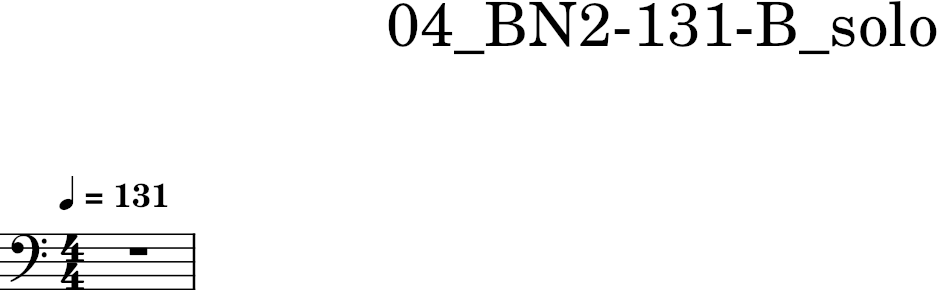

In [156]:
import music21

# Specify the path to your MIDI file
midi_path = "./04_BN2-131-B_solo.mid"
mf = music21.midi.MidiFile()
mf.open(midi_path)
mf.read()
mf.close()

# Convert MIDI file to music21 stream
midi_stream = music21.midi.translate.midiFileToStream(mf)
midi_stream.insert(0, music21.metadata.Metadata())
midi_stream.metadata.title = "04_BN2-131-B_solo"
Streams = midi_stream.getElementsByClass('Part')
Streams[0].getElementsByClass('Measure')[0].show()

# # Add chords from jam
# chords = jam.search(namespace='chord')[0].data
# tempo =jam.search(namespace='tempo')[0].data[0].value

# Measures = Streams[0].getElementsByClass('Measure')


# for chord in chords:
#     chord_name = chord.value.replace(':', '').replace('hdim7', 'm7b5')
#     print(chord_name)
#     chord_duration = chord.duration
#     chord_duration_beats = round(tempo / 60 * chord_duration, 4)
#     num_measure = int(((chords[-1].time)*bpm/60)/4)-1
#     # Add chord symbol
#     chord_obj = music21.harmony.ChordSymbol(chord_name)
#     chord_obj.quarterLength = chord_duration_beats
#     Measures[num_measure].insert(0, chord_obj)




# # Save as MusicXML
# midi_stream.write('musicxml', './data/04_BN2-131-B_solo.xml')


In [ ]:
import music21
#this one works
# Specify the path to your MIDI file
midi_path = "./04_BN2-131-B_solo.mid"
mf = music21.midi.MidiFile()
mf.open(midi_path)
mf.read()
mf.close()

# Convert MIDI file to music21 stream
midi_stream = music21.midi.translate.midiFileToStream(mf)

# Assuming the existence of some `jam` object or data that you fetch elsewhere
# For this example, let's create some dummy chord data to work with
# Example chord data and tempo - you should replace this with your actual data
chords = jam.search(namespace='chord')[0].data
tempo = jam.search(namespace='tempo')[0].data[0].value # bpm, this should come from your `jam` object

# You might want to process the first part only if there are multiple parts
part = midi_stream.getElementsByClass('Part')
max_part = max(part, key=lambda part: len(part.getElementsByClass('Measure')))
# Process each chord
for chord_data in chords:
    chord_name = chord_data.value.replace(':', '').replace('hdim7', 'm7b5')
    print(chord_name)
    chord_duration = chord_data.duration
    # Calculate the duration in quarter lengths assuming 60 seconds per minute
    chord_duration_quarters = (tempo / 60) * chord_duration
    # Calculate where to insert the chord in terms of measures
    start_measure = int((chord_data.time * tempo / 60) / 4)  # Simplified estimate
    print(start_measure)
    chord_obj = music21.harmony.ChordSymbol(chord_name)
    chord_obj.duration.quarterLength = chord_duration_quarters
    max_part.getElementsByClass('Measure')[start_measure].insert(0, chord_obj)  # measures are 1-indexed

# Set metadata
midi_stream.metadata = music21.metadata.Metadata()
midi_stream.metadata.title = "04_BN2-131-B_solo"

# Save as MusicXML (for viewing in notation software)
midi_stream.write('musicxml', '04_BN2-131-B_solo.xml')




In [69]:
d = music21.duration.Duration()
d.quarterLength = 4
d

<music21.duration.Duration 4.0>

{0.0} <music21.stream.Measure 0 offset=0.0>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.harmony.ChordSymbol C>
    {2.0} <music21.harmony.ChordSymbol E>
    {4.0} <music21.note.Note C>
    {6.0} <music21.note.Note E>
{8.0} <music21.stream.Measure 0 offset=8.0>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.harmony.ChordSymbol G>
    {0.0} <music21.note.Note G>
    {2.0} <music21.harmony.ChordSymbol B>
    {2.0} <music21.note.Note B>


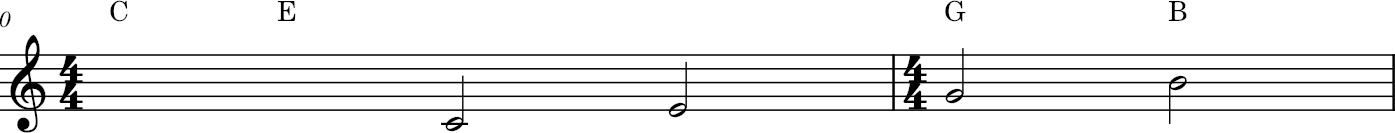

In [122]:
from music21 import stream, note, harmony, meter

# Create a new stream
my_stream = stream.Stream()

# Create a measure with a time signature
my_measure = stream.Measure()
my_measure.timeSignature = meter.TimeSignature('4/4')

# Define some notes
note1 = note.Note('C4')  # Middle C
note1.duration.quarterLength = 2  # Half note
note2 = note.Note('E4')  # E above middle C
note2.duration.quarterLength = 2  # Half note
note3 = note.Note('G4')  # G above middle C
note3.duration.quarterLength = 2 # Half note
note4 = note.Note('B4')  # B above middle C
note4.duration.quarterLength = 2 # Half note

# Create a chord symbol
chord_obj = harmony.ChordSymbol('C')
chord_obj.quarterLength = 2
chord_obj_2 = harmony.ChordSymbol('E')
chord_obj_2.quarterLength = 2
# Add the chord symbol to the measure (on the first beat)
my_measure.insert(0, chord_obj)
my_measure.insert(2, chord_obj_2)

second_measure = stream.Measure()
second_measure.timeSignature = meter.TimeSignature('4/4')

second_measure.append(note3)
second_measure.append(note4)
#add chords
chord_obj_3 = harmony.ChordSymbol('G')
chord_obj_3.quarterLength = 2
chord_obj_4 = harmony.ChordSymbol('B')
chord_obj_4.quarterLength = 2
second_measure.insert(0, chord_obj_3)
second_measure.insert(2, chord_obj_4)

# Add the notes to the measure
my_measure.append(note1)
my_measure.append(note2)

# Add the measure to the stream
my_stream.append(my_measure)
my_stream.append(second_measure)

# Show the stream in textual format
my_stream.show('text')

# Optionally, display the stream in musical notation (requires MuseScore or similar software)
my_stream.show()

